In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
print("Loading dataset...")
# Update the path to match where you saved the file in your Google Drive
df = pd.read_csv('/content/drive/MyDrive/ENPM703/Project/phishing_email.csv')

Mounted at /content/drive
Loading dataset...


In [3]:
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())


Dataset shape: (82486, 2)

Column names: ['text_combined', 'label']

First few rows:
                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0


In [4]:
# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")


Missing values:
text_combined    0
label            0
dtype: int64


In [5]:
text_column = 'text_combined'
label_column = 'label'

df = df.dropna(subset=[text_column, label_column])

In [6]:
print(f"\nClass distribution:")
# Split data into features and labels
X = df[text_column]
y = df['label']
print(df['label'].value_counts())


Class distribution:
label
1    42891
0    39595
Name: count, dtype: int64


In [7]:
# Split data into features and labels
X = df[text_column]
y = df[label_column]

In [8]:
# First split: 70% train, 30% temp (which will be split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
# Second split: Split temp into 50% val, 50% test (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [10]:
print(f"\nDataset splits:")
print(f"Train set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")


Dataset splits:
Train set: 57740 samples (70.0%)
Validation set: 12373 samples (15.0%)
Test set: 12373 samples (15.0%)


In [11]:
# Text vectorization using TF-IDF
print("\nVectorizing text data...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

print(f"Feature vector shape: {X_train_vec.shape}")


Vectorizing text data...
Feature vector shape: (57740, 5000)


In [12]:
# Hyperparameter tuning: Find best k value
print("\n" + "="*60)
print("HYPERPARAMETER TUNING: Finding optimal k value")
print("="*60)

k_values = range(1, 31, 2)  # Test odd values from 1 to 29
train_scores = []
val_scores = []

for k in k_values:
    print(f"\nTesting k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_vec, y_train)

    train_pred = knn.predict(X_train_vec)
    val_pred = knn.predict(X_val_vec)

    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)

    train_scores.append(train_acc)
    val_scores.append(val_acc)

    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Val Accuracy: {val_acc:.4f}")


HYPERPARAMETER TUNING: Finding optimal k value

Testing k=1...
  Train Accuracy: 0.9998
  Val Accuracy: 0.8639

Testing k=3...
  Train Accuracy: 0.9014
  Val Accuracy: 0.8142

Testing k=5...
  Train Accuracy: 0.8385
  Val Accuracy: 0.7807

Testing k=7...
  Train Accuracy: 0.7920
  Val Accuracy: 0.7524

Testing k=9...
  Train Accuracy: 0.7565
  Val Accuracy: 0.7297

Testing k=11...
  Train Accuracy: 0.7287
  Val Accuracy: 0.7095

Testing k=13...
  Train Accuracy: 0.7089
  Val Accuracy: 0.6936

Testing k=15...
  Train Accuracy: 0.6939
  Val Accuracy: 0.6829

Testing k=17...
  Train Accuracy: 0.6812
  Val Accuracy: 0.6730

Testing k=19...
  Train Accuracy: 0.6718
  Val Accuracy: 0.6655

Testing k=21...
  Train Accuracy: 0.6641
  Val Accuracy: 0.6586

Testing k=23...
  Train Accuracy: 0.6574
  Val Accuracy: 0.6521

Testing k=25...
  Train Accuracy: 0.6510
  Val Accuracy: 0.6475

Testing k=27...
  Train Accuracy: 0.6464
  Val Accuracy: 0.6431

Testing k=29...
  Train Accuracy: 0.6423
  Val

In [13]:
# Find best k based on validation accuracy (excluding k=1)
val_scores_no_k1 = val_scores[1:]  # Skip first element (k=1)
k_values_no_k1 = list(k_values)[1:]  # Skip k=1

best_k_idx = np.argmax(val_scores_no_k1)
best_k = k_values_no_k1[best_k_idx]
best_val_acc = val_scores_no_k1[best_k_idx]

print(f"\n{'='*60}")
print(f"BEST K VALUE (excluding k=1): {best_k}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"For comparison, k=1 had accuracy: {val_scores[0]:.4f}")
print(f"{'='*60}")


BEST K VALUE (excluding k=1): 3
Best Validation Accuracy: 0.8142
For comparison, k=1 had accuracy: 0.8639


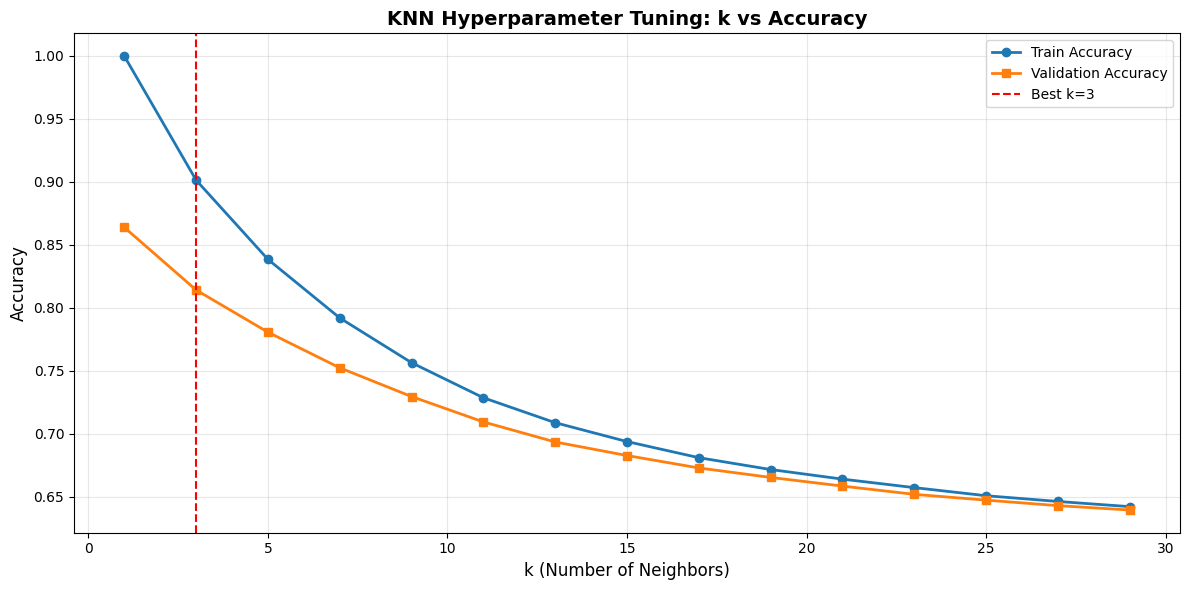

In [14]:
# Plot hyperparameter tuning results
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(k_values, val_scores, marker='s', label='Validation Accuracy', linewidth=2)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Hyperparameter Tuning: k vs Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('knn_hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Train final model with best k
print(f"\n{'='*60}")
print("TRAINING FINAL MODEL")
print(f"{'='*60}")

final_knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
final_knn.fit(X_train_vec, y_train)


TRAINING FINAL MODEL


KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [16]:
# Evaluate on all sets
train_pred = final_knn.predict(X_train_vec)
val_pred = final_knn.predict(X_val_vec)
test_pred = final_knn.predict(X_test_vec)

In [17]:
# Calculate metrics for each set
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Set Metrics:")
    print(f"  Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"  Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"  F1-Score:  {f1_score(y_true, y_pred):.4f}")

print_metrics(y_train, train_pred, "Training Accuracy")
print_metrics(y_val, val_pred, "Validation Accuracy")
print_metrics(y_test, test_pred, "Test Accuracy")


Training Accuracy Set Metrics:
  Accuracy:  0.9014
  Precision: 0.8436
  Recall:    0.9947
  F1-Score:  0.9130

Validation Accuracy Set Metrics:
  Accuracy:  0.8142
  Precision: 0.7426
  Recall:    0.9837
  F1-Score:  0.8463

Test Accuracy Set Metrics:
  Accuracy:  0.8124
  Precision: 0.7402
  Recall:    0.9848
  F1-Score:  0.8452


In [18]:
# Detailed classification report for test set
print(f"\n{'='*60}")
print("DETAILED TEST SET CLASSIFICATION REPORT")
print(f"{'='*60}")
print(classification_report(y_test, test_pred, target_names=['Safe Email', 'Phishing Email']))


DETAILED TEST SET CLASSIFICATION REPORT
                precision    recall  f1-score   support

    Safe Email       0.97      0.63      0.76      5940
Phishing Email       0.74      0.98      0.85      6433

      accuracy                           0.81     12373
     macro avg       0.86      0.81      0.80     12373
  weighted avg       0.85      0.81      0.81     12373



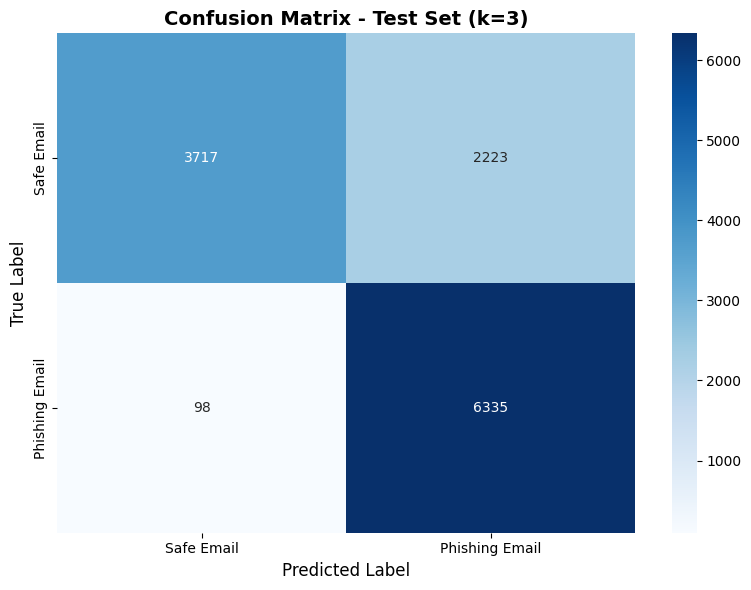

In [19]:
# Confusion Matrix for test set
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Safe Email', 'Phishing Email'],
            yticklabels=['Safe Email', 'Phishing Email'])
plt.title(f'Confusion Matrix - Test Set (k={best_k})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Summary
print(f"\n{'='*60}")
print("FINAL SUMMARY")
print(f"{'='*60}")
print(f"Best k value: {best_k}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print(f"Test F1-Score: {f1_score(y_test, test_pred):.4f}")
print(f"\nModel saved as 'final_knn' and vectorizer as 'vectorizer'")


FINAL SUMMARY
Best k value: 3
Test Accuracy: 0.8124
Test F1-Score: 0.8452

Model saved as 'final_knn' and vectorizer as 'vectorizer'


In [22]:
# Example prediction function
def predict_email(email_text):
    """Predict if an email is phishing or safe"""
    email_vec = vectorizer.transform([email_text])
    prediction = final_knn.predict(email_vec)[0]
    proba = final_knn.predict_proba(email_vec)[0]

    label = "Phishing Email" if prediction == 1 else "Safe Email"
    confidence = proba[prediction] * 100

    return label, confidence

# Testing with a sample email
print(f"\n{'='*60}")
print("EXAMPLE PREDICTION")
print(f"{'='*60}")
sample_email = X_test.iloc[0]
true_label = y_test.iloc[0]

pred_label, confidence = predict_email(sample_email)
print(f"Email: {sample_email[:100]}...")
print(f"True Label: {'Phishing Email' if true_label == 1 else 'Safe Email'}")
print(f"Prediction: {pred_label}")
print(f"Confidence: {confidence:.2f}%")


EXAMPLE PREDICTION
Email: denver craig eawfdmboulderpcscom make secure order canadian pharmacy online drugstore receive order ...
True Label: Phishing Email
Prediction: Phishing Email
Confidence: 100.00%
